In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics roboflow --quiet
from IPython import display
display.clear_output()
!yolo checks


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)

OS                     Linux-6.6.105+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.12
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    12.67 GB
Disk                   39.4/112.6 GB
CPU                    Intel Xeon CPU @ 2.20GHz
CPU count              2
GPU                    Tesla T4, 15095MiB
GPU count              1
CUDA                   12.6

numpy                  ✅ 2.0.2>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
opencv-p

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!pip install roboflow
# второй датасет https://universe.roboflow.com/people-ovwo9/people-h6tqu/dataset/1
# также обработан и аугументирован
#Augmentations
#Outputs per training example: 3
#90° Rotate: Clockwise, Counter-Clockwise
#Grayscale: Apply to 15% of images
#Blur: Up to 2.5px
#Noise: Up to 0.97% of pixels
from roboflow import Roboflow
rf = Roboflow(api_key="siSbckXcVt9HkM8LqR5U")
project = rf.workspace("people-ovwo9").project("people-h6tqu")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to people-1 in yolov8:: 100%|██████████| 49050/49050 [00:09<00:00, 4909.61it/s] 


In [5]:
import torch
from ultralytics.nn.tasks import DetectionModel

torch.serialization.add_safe_globals([DetectionModel])

In [7]:
model = YOLO("yolov8s.pt")
results = model.train(
    data=f"{dataset.location}/data.yaml",epochs=20,batch=32)


Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/people-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

/content


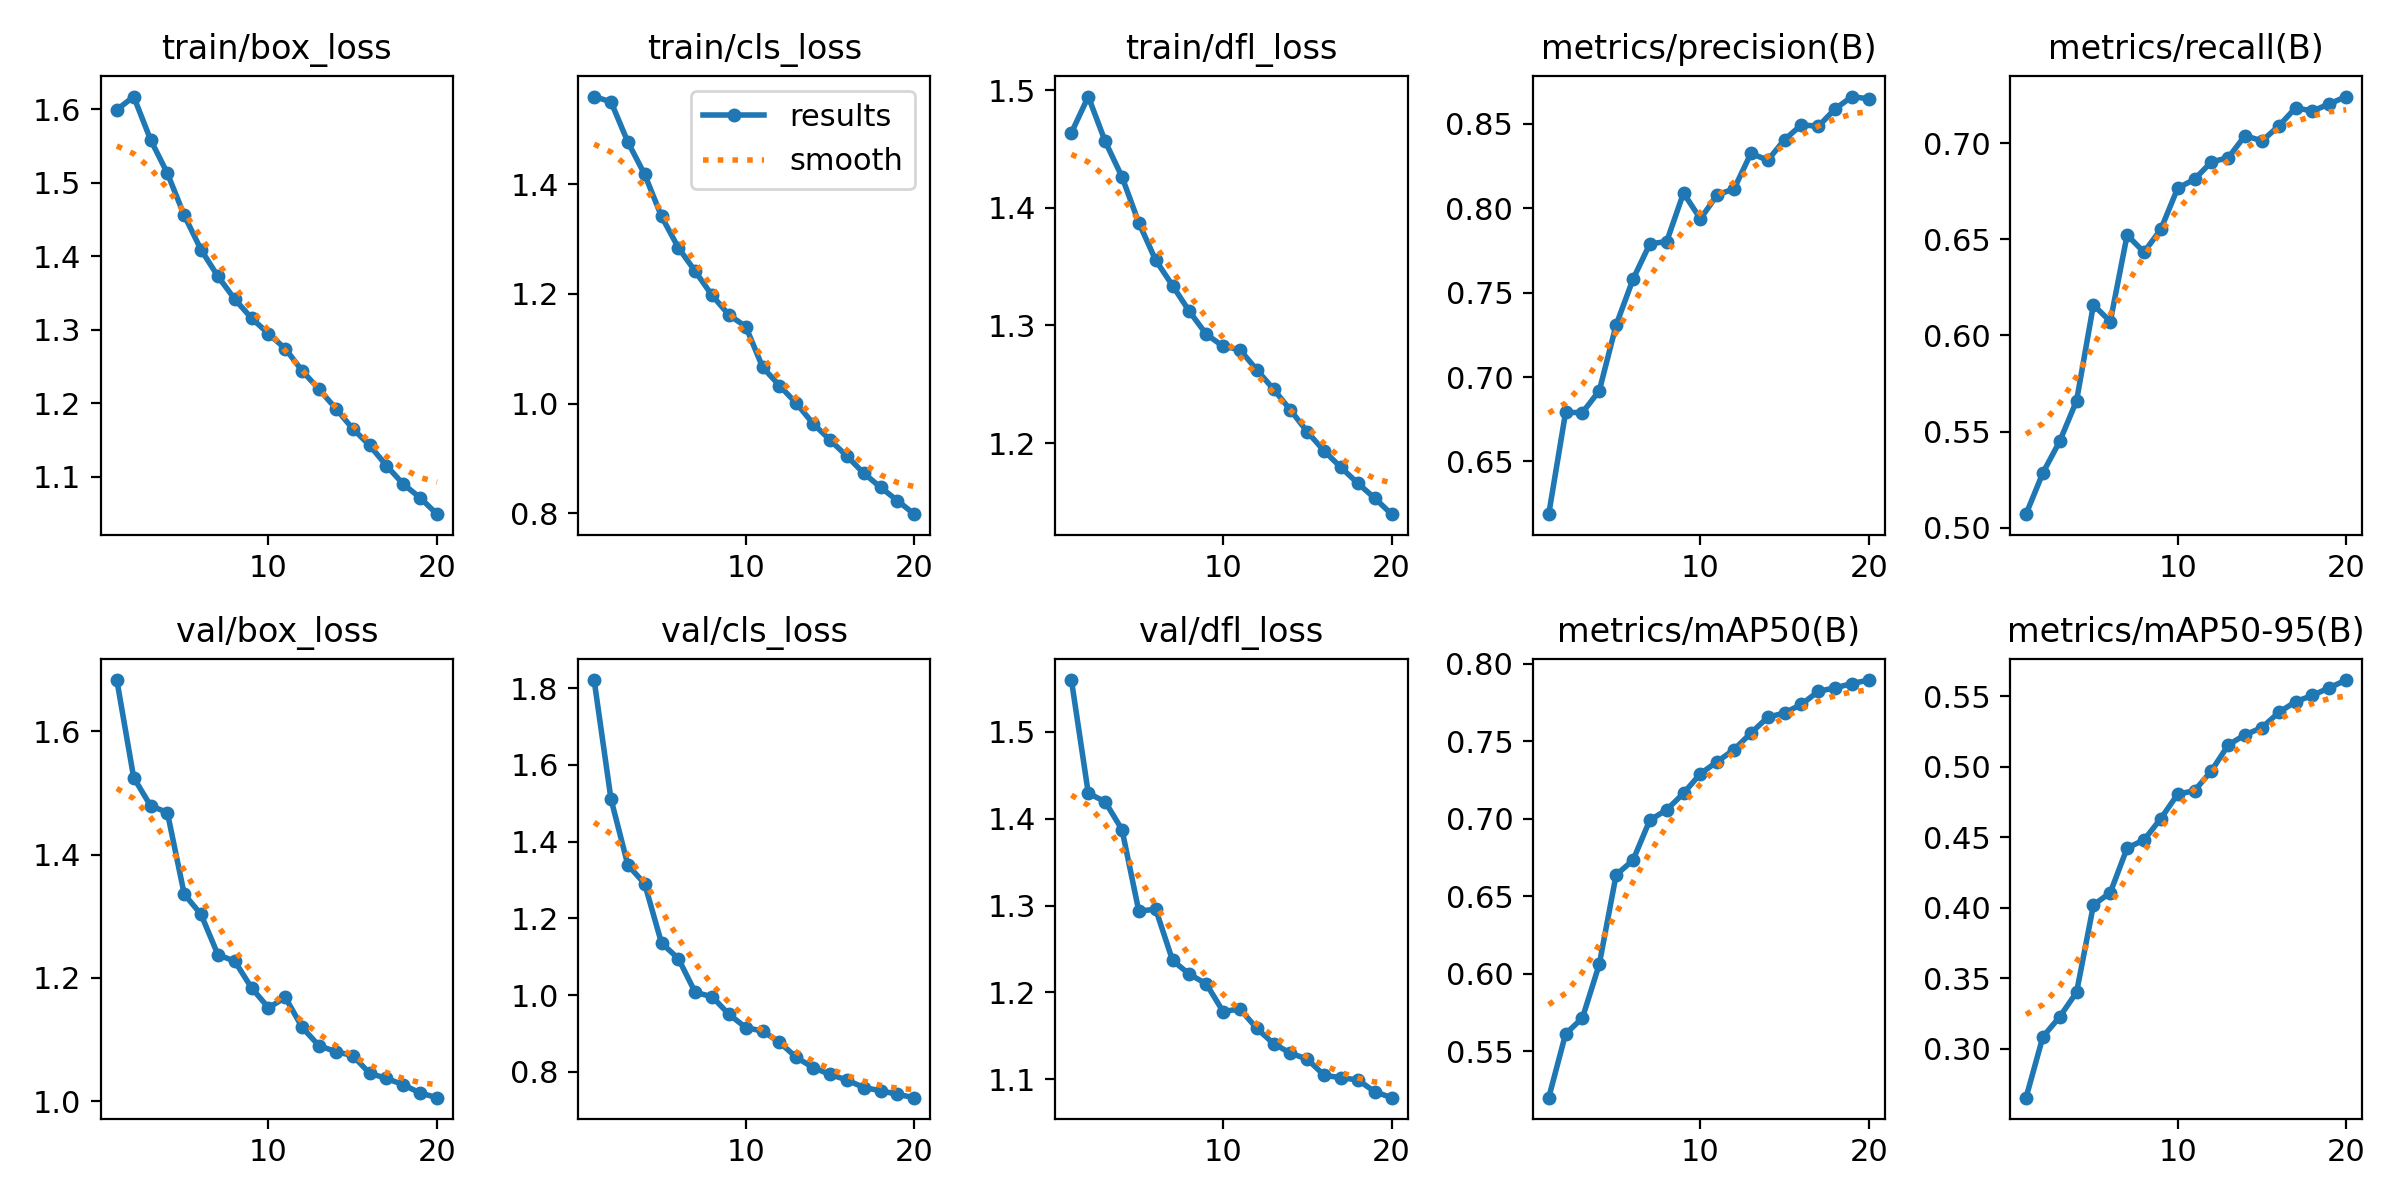

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)